# Exam Project

Import and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
from ExchangeEconomyModel import ExchangeEconomyModelClass
from ASADModel import ASADModelClass


## Problem 1

### Question 1.a

In [2]:
#hej 

## Problem 2

### Question 2.1

__Summary of Findings:__

The left panel shows the demand for good 1 for A and B as a function of the price of good 1. Consumer A’s demand for good 1 is increasing in $(p_1)$ due to a positive income effect from her large endowment of good 1, while consumer B’s demand is decreasing as good 1 becomes relatively more expensive.

The right panel show the excess-demand function $(\epsilon_1(p_1))$. The curve crosses zero at three distinct price levels, implying three  equilibria. Market occurs at approximately $(p_1 \approx 0.42)$, $(p_1 \approx 0.99)$, and $(p_1 \approx 2.39)$. 

Approximate equilibrium prices for good 1:
Low equilibrium:      p1 ≈ 0.41792929
Middle equilibrium:   p1 ≈ 0.99368687
High equilibrium:     p1 ≈ 2.38510101


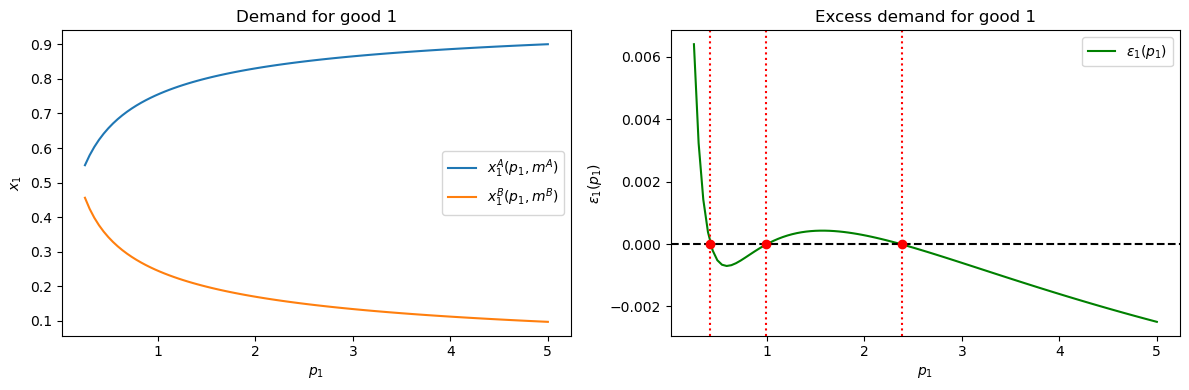

In [3]:
# 1) Model
Exchange = ExchangeEconomyModelClass()

# 2) Price grid
p1_grid = np.linspace(0.25, 5, 100)

# 3) compute demands + excess demand
x1A = np.empty_like(p1_grid)
x1B = np.empty_like(p1_grid)
eps1 = np.empty_like(p1_grid)

for i, p1 in enumerate(p1_grid):
    # Demands
    x1A[i], _ = Exchange.demand_A(p1)
    x1B[i], _ = Exchange.demand_B(p1)

    # Excess demand for good 1: eps1(p1) = x1A + x1B - 1
    eps1[i] = x1A[i] + x1B[i] - 1


# # 4) Compute approximate equilibrium prices
# # Find sign changes (approximate roots) since this is where excess demand crosses zero
sign_changes = np.where(np.sign(eps1[:-1]) != np.sign(eps1[1:]))[0]

# # Approximate equilibrium prices from sign changes
p1_eq_scan = 0.5 * (p1_grid[sign_changes] + p1_grid[sign_changes + 1])
p1_eq_scan = np.sort(p1_eq_scan)

p_low_scan, p_mid_scan, p_high_scan = p1_eq_scan


# Print results clearly
print("Approximate equilibrium prices for good 1:")
print(f"Low equilibrium:      p1 ≈ {p_low_scan:.8f}")
print(f"Middle equilibrium:   p1 ≈ {p_mid_scan:.8f}")
print(f"High equilibrium:     p1 ≈ {p_high_scan:.8f}")


# 5) Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# 5.1 Demands plot
ax[0].plot(p1_grid, x1A, label=r"$x_1^A(p_1,m^A)$")
ax[0].plot(p1_grid, x1B, label=r"$x_1^B(p_1,m^B)$")
ax[0].set_xlabel(r"$p_1$")
ax[0].set_ylabel(r"$x_1$")
ax[0].set_title("Demand for good 1")
ax[0].legend()

# 5.2 Excess demand plot
ax[1].plot(p1_grid, eps1, color="green", label=r"$\epsilon_1(p_1)$")
ax[1].axhline(0, linestyle="--", color="black")

for p in p1_eq_scan:
    ax[1].plot(p, 0, 'ro')
    ax[1].axvline(p, color='red', ls=':')

ax[1].set_xlabel(r"$p_1$")
ax[1].set_ylabel(r"$\epsilon_1(p_1)$")
ax[1].set_title("Excess demand for good 1")
ax[1].legend()


plt.tight_layout()
plt.show()




### Question 2.2

__Summary of Findings:__

Starting from $(p_1^0 = 0.9)$, the tâtonnement algorithm converges to the low equilibrium $(p_1 \approx 0.42)$, while starting from $(p_1^0 = 1.1)$ it converges to the high equilibrium $(p_1 \approx 2.37)$. Hence, the choice of initial guess determines which equilibrium is selected.

Although $(p_1 \approx 1)$ is a Walrasian equilibrium, it is unstable under tâtonnement. Small deviations from this price cause the adjustment process to move away toward either the low or the high stable equilibrium.


Low tatonnement equilibrium: 0.42187627669863426
High tatonnement equilibrium: 2.3703561473576165


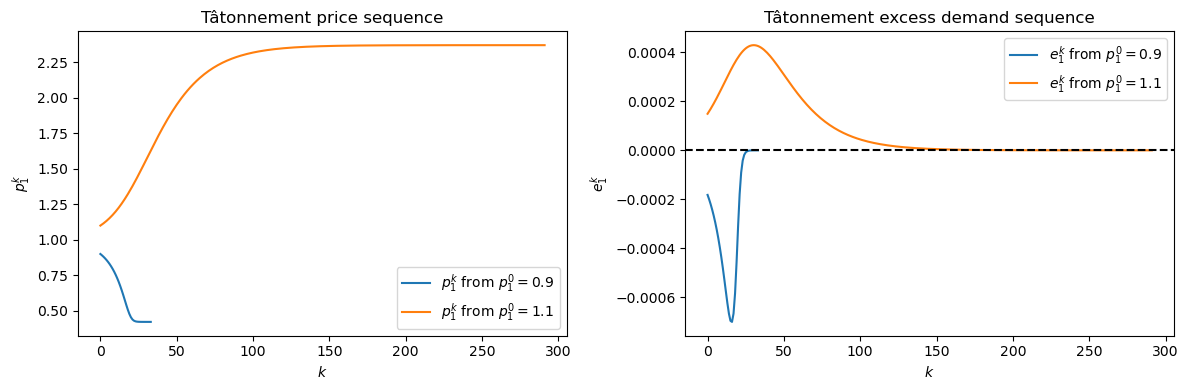

In [4]:
#1) Run tatonnement from two different starting points
p_seq_09, e_seq_09 = Exchange.tatonnement(0.9)
p_seq_11, e_seq_11 = Exchange.tatonnement(1.1)

# Tatonnement equilibrium prices
p1_eq_low_T = p_seq_09[-1]
p1_eq_high_T = p_seq_11[-1]

print("Low tatonnement equilibrium:", p1_eq_low_T)
print("High tatonnement equilibrium:", p1_eq_high_T)


#2) Plot results
fig, ax = plt.subplots(1, 2, figsize=(12,4))

# 2.1) Prices plot
ax[0].plot(p_seq_09, label=r"$p_1^k$ from $p_1^0=0.9$")
ax[0].plot(p_seq_11, label=r"$p_1^k$ from $p_1^0=1.1$")
ax[0].set_xlabel(r"$k$")
ax[0].set_ylabel(r"$p_1^k$")
ax[0].set_title("Tâtonnement price sequence")
ax[0].legend()

# 2.2)Excess demand plot
ax[1].plot(e_seq_09, label=r"$e_1^k$ from $p_1^0=0.9$")
ax[1].plot(e_seq_11, label=r"$e_1^k$ from $p_1^0=1.1$")
ax[1].axhline(0, linestyle="--", color="black")
ax[1].set_xlabel(r"$k$")
ax[1].set_ylabel(r"$e_1^k$")
ax[1].set_title("Tâtonnement excess demand sequence")
ax[1].legend()

plt.tight_layout()
plt.show()




### Question 2.3

__Summary of Findings:__

Applying the tâtonnement algorithm to a grid of initial prices $(p_1^0 \in \texttt{linspace}(0.25,5,50))$ leads to convergence only to the low and high equilibria. The middle equilibrium does not appear in the numerical results because it is unstable, and the grid does not contain exactly this price. As a result, any nearby initial guess causes the price to move toward one of the stable equilibria.

From an economic point of view, the middle price is still a Walrasian equilibrium. If the initial guess were exactly equal to this price, excess demand would be zero and the tâtonnement process would remain there. However, this case does not arise in the numerical implementation due to the discrete grid of initial prices.


Tatonnement equilibria: [0.4219 2.3704]


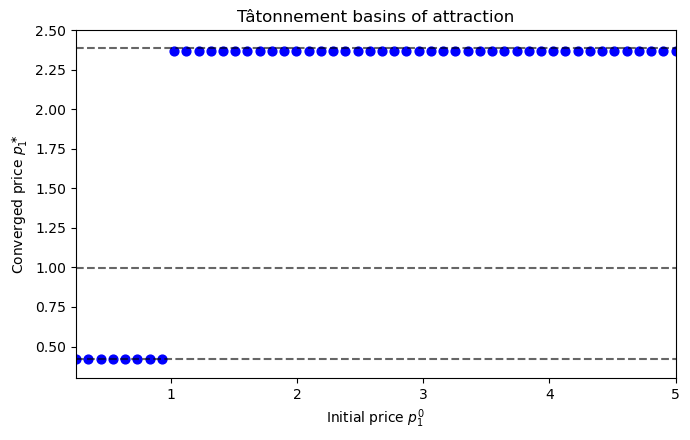

In [5]:
# 1) Many initial guesses
p0_grid = np.linspace(0.25, 5, 50)

pstar = np.empty_like(p0_grid)
converged = np.zeros_like(p0_grid, dtype=bool)

for i, p0 in enumerate(p0_grid):
    p_seq, e_seq = Exchange.tatonnement(p0)
    pstar[i] = p_seq[-1]
    converged[i] = (abs(e_seq[-1]) < Exchange.par.tol)  

# 2) Equilibria
p1_eq_tatonnement = []

for p0 in np.linspace(0.25, 5, 50):
    p_star = Exchange.solve_walras(p0, method='tatonnement')
    p1_eq_tatonnement.append(p_star)
p1_eq_tatonnement = np.sort(np.unique(np.round(p1_eq_tatonnement, 4)))

print("Tatonnement equilibria:", p1_eq_tatonnement)

# 3) Plot
plt.figure(figsize=(7,4.5))

plt.scatter(p0_grid, pstar, color="blue", s=40)

# Highlight converged points based on the 2.1
for p in [p_low_scan, p_mid_scan, p_high_scan]:
    plt.axhline(p, ls="--", color="black", alpha=0.6)


plt.xlabel(r"Initial price $p_1^0$")
plt.ylabel(r"Converged price $p_1^\ast$")
plt.title("Tâtonnement basins of attraction")

plt.xlim(p0_grid.min(), p0_grid.max())
plt.ylim(0.30, 2.50)

plt.tight_layout()
plt.show()



### Question 2.4

__Summary of Findings:__

The dampened Newton–Raphson algorithm converges to alll three  equilibrium prices,  $( p_1^* \approx 0.4219 )$, $( p_1^* = 1.0000 )$ and $( p_1^* \approx 2.3704 )$. Which equilibrium is reached depends on the initial price guess $( p_1^0 )$, indicating the presence of multiple basins of attraction. Thus, the method identifies all equilibria in the model, but convergence is sensitive to initial conditions.


NR equilibrium prices: [0.4219 1.     2.3704]


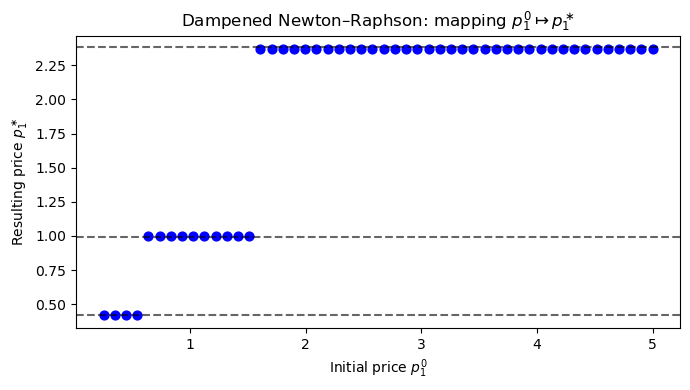

In [ ]:
#1) Grid and plot

p0_grid = np.linspace(0.25, 5, 50)

pstar = np.empty_like(p0_grid)
converged = np.zeros_like(p0_grid, dtype=bool)

for i, p0 in enumerate(p0_grid):
    p_seq, e_seq = Exchange.newton_damped(p0)
    pstar[i] = p_seq[-1]
    converged[i] = (abs(e_seq[-1]) < Exchange.par.tol)

# 2) Equilibria

p1_eq_NR = []

for p0 in np.linspace(0.25, 5, 50):
    p_star = Exchange.solve_walras(p0, method='newton')
    p1_eq_NR.append(p_star)

p1_eq_NR = np.sort(np.unique(np.round(p1_eq_NR, 4)))

# p1_eq_NR = np.sort(np.unique(np.round(pstar[converged], 4)))
print("NR equilibrium prices:", p1_eq_NR)

# p_low_NR, p_mid_NR, p_high_NR = p1_eq_NR


#3) Plot
plt.figure(figsize=(7,4))

plt.scatter(p0_grid[converged], pstar[converged], color="blue", s=40) 

# Highlight converged points based on the 2.1
for p in [p_low_scan, p_mid_scan, p_high_scan]:
    plt.axhline(p, ls="--", color="black", alpha=0.6)


plt.xlabel(r"Initial price $p_1^0$")
plt.ylabel(r"Resulting price $p_1^\ast$")
plt.title("Dampened Newton–Raphson: mapping $p_1^0 \\mapsto p_1^\\ast$")
plt.tight_layout()



### Question 2.5

__Summary of Findings:__

The Edgeworth box illustrates competitive equilibria computed using both tâtonnement and Newton–Raphson methods. In both cases, the equilibria correspond to allocations where individual demands are mutually consistent and markets clear.

The tâtonnement approach identifies equilibria through gradual price adjustment and converges to a smaller set of dynamically stable equilibrium points. In this case, it identifies only two equilibria. In contrast, the Newton–Raphson method uncovers multiple equilibria by exploiting local information and different initial price guesses, and is able to identify all three equilibria in the model.

Overall, both methods confirm the same underlying economic equilibria, but Newton–Raphson provides a more complete picture of equilibrium multiplicity, while tâtonnement highlights those equilibria that are dynamically stable.



Tatonnement equilibria: [0.4219 2.3704]


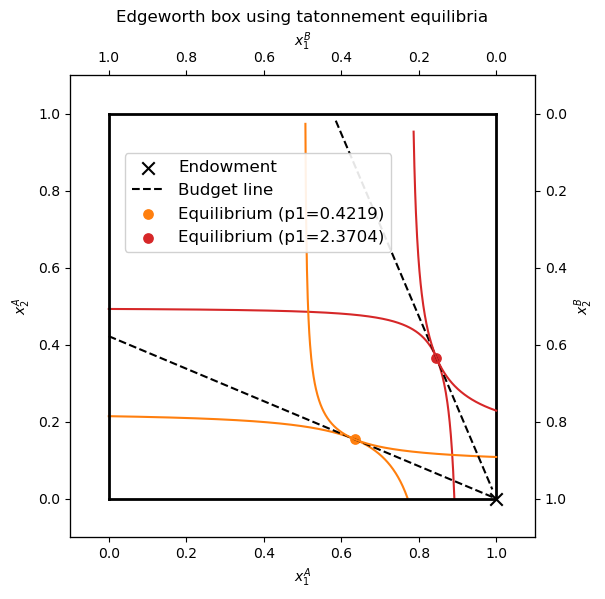

In [7]:
# 1.1) Find equilibria using tatonnement
print("Tatonnement equilibria:", p1_eq_tatonnement)

fig, ax_A, ax_B = Exchange.create_edgeworthbox()

# Endowment
w1A, w2A = Exchange.par.w1A, Exchange.par.w2A
ax_A.scatter(w1A, w2A, marker='x', s=80, color='black', label='Endowment')

colors = ['tab:orange', 'tab:red']

for i, p1 in enumerate(p1_eq_tatonnement):

    col = colors[i % len(colors)]

    # Budget line 
    Exchange.sol.p1 = float(p1)
    Exchange.plot_budget_line(ax_A)
    ax_A.lines[-1].set_color('black')
    ax_A.lines[-1].set_linestyle('--')

    # only label budget line once
    if i == 0:
        ax_A.lines[-1].set_label('Budget line')
    else:
        ax_A.lines[-1].set_label(None)

    # Demands
    x1A, x2A = Exchange.demand_A(p1)
    x1B, x2B = Exchange.demand_B(p1)

    # Equilibrium point
    ax_A.scatter(x1A, x2A, color=col, s=45,
                 label=f'Equilibrium (p1={p1:.4f})')

    # Indifference curves (same color as equilibrium)
    Exchange.indifference_curve_A(ax_A, x1A, x2A, color=col)
    Exchange.indifference_curve_B(ax_B, x1B, x2B, color=col)

# Legend + title
Exchange.add_legend(ax_A, ax_B)
plt.title("Edgeworth box using tatonnement equilibria")
plt.show()


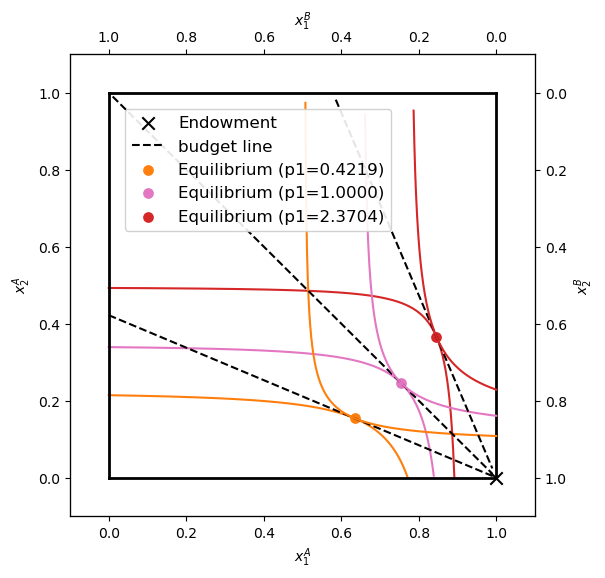

In [8]:
# 1.2) Find equilibria using Newton-Raphson
fig, ax_A, ax_B = Exchange.create_edgeworthbox()

# Endowment
w1A, w2A = Exchange.par.w1A, Exchange.par.w2A
ax_A.scatter(w1A, w2A, marker='x', s=80, color='black', label='Endowment')

colors = ['tab:orange', 'tab:pink', 'tab:red']

for i, p1 in enumerate(p1_eq_NR):

    col = colors[i]

    # Budget line 
    Exchange.sol.p1 = float(p1)
    Exchange.plot_budget_line(ax_A)
    ax_A.lines[-1].set_color('black')
    ax_A.lines[-1].set_linestyle('--')

    if i > 0:
        ax_A.lines[-1].set_label(None)

    # Demands
    x1A, x2A = Exchange.demand_A(p1)
    x1B, x2B = Exchange.demand_B(p1)

    # Equilibrium point
    ax_A.scatter(x1A, x2A, color=col, s=45,
                 label=f'Equilibrium (p1={p1:.4f})')
    
    # Add legend 
    Exchange.add_legend(ax_A, ax_B)


    # Indifference curves (same color as equilibrium)
    Exchange.indifference_curve_A(ax_A, x1A, x2A, color=col)
    Exchange.indifference_curve_B(ax_B, x1B, x2B, color=col)


## Problem 3

### Question 3.1

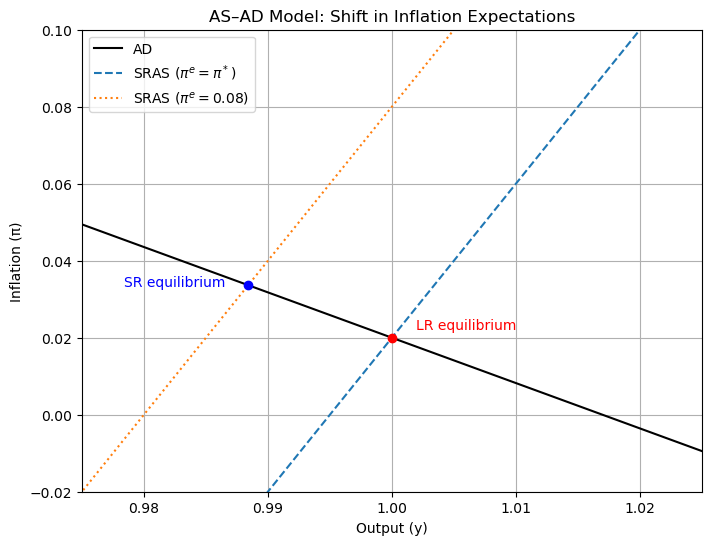

Long run equilibrium:
y = 1.000, pi = 0.020
\Short run equilibrium after jump in inflation expectations:
y = 0.988, pi = 0.034


In [9]:
# initialize model
from ASADModel import ASADModelClass
ASADModel = ASADModelClass()
p = ASADModel.par

# grid for output
y = np.linspace(0.8, 1.2, 400)

# no demand shock
v = 0.0

# AD curve
pi_ad = ASADModel.AD_curve(y, v)

# SRAS with expected inflation = inflation target (long run)
pi_e_1 = p['pi_star']
pi_sras_1 = ASADModel.SRAS_curve(y, pi_e_1)

# SRAS after jump in inflation expectations
pi_e_2 = 0.08
pi_sras_2 = ASADModel.SRAS_curve(y, pi_e_2)

# ---------- equilibrium calculations ----------

# long-run equilibrium
y_LR, pi_LR = ASADModel.equilibrium(p['pi_star'], v)

# short-run equilibrium after jump in expectations
y_SR, pi_SR = ASADModel.equilibrium(pi_e_2, v)


# ---------- plot ----------

plt.figure(figsize=(8,6))

# curves
plt.plot(y, pi_ad, label='AD', color='black')
plt.plot(y, pi_sras_1, label=r'SRAS ($\pi^e = \pi^*$)', linestyle='--')
plt.plot(y, pi_sras_2, label=r'SRAS ($\pi^e = 0.08$)', linestyle=':')

# equilibria points
plt.scatter(y_LR, pi_LR, color='red', zorder=5)
plt.scatter(y_SR, pi_SR, color='blue', zorder=5)

# annotations
plt.text(
    y_LR + 0.01, pi_LR + 0.005,
    'LR equilibrium',
    ha='right', va='top',
    color='red'
)

plt.text(
    y_SR - 0.01, pi_SR - 0.001,
    'SR equilibrium',
    ha='left', va='bottom',
    color='blue'
)
# labels and layout
plt.xlabel('Output (y)')
plt.ylabel('Inflation (π)')
plt.title('AS–AD Model: Shift in Inflation Expectations')
plt.legend()
plt.grid(True)
plt.ylim(-0.02, 0.1)
plt.xlim(0.975, 1.025)
plt.show()

# ---------- print equilibrium values ----------

print("Long run equilibrium:")
print(f"y = {y_LR:.3f}, pi = {pi_LR:.3f}")

print("\Short run equilibrium after jump in inflation expectations:")
print(f"y = {y_SR:.3f}, pi = {pi_SR:.3f}")


### Question 3.2

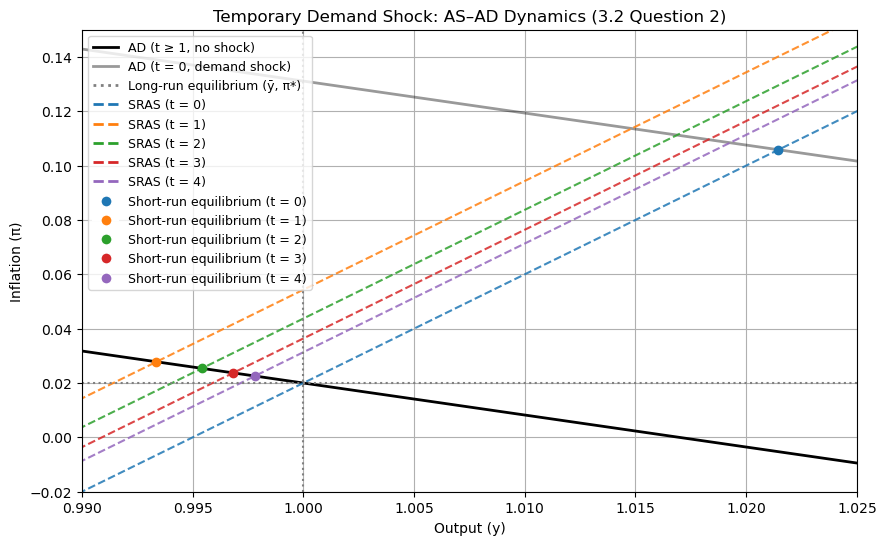

Equilibrium values by period:
t = 0: y = 1.0215, pi = 0.1058
t = 1: y = 0.9934, pi = 0.0278
t = 2: y = 0.9954, pi = 0.0254
t = 3: y = 0.9968, pi = 0.0237
t = 4: y = 0.9978, pi = 0.0226

Long-run equilibrium:
y = 1.0000, pi = 0.0200


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from ASADModel import ASADModelClass

# Model
model = ASADModelClass()
p = model.par

# Time horizon
T = 5

# Demand shock: temporary shock in t=0
v = np.zeros(T)
v[0] = 0.1

# Expected inflation (adaptive)
pi_e = np.zeros(T)
pi_e[0] = p['pi_star']

# Storage for equilibria
y_star = np.zeros(T)
pi_star = np.zeros(T)

# Grid for curves
y_grid = np.linspace(0.8, 1.2, 400)

# Colors for each period
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Figure
plt.figure(figsize=(10, 6))

# AD curves
# AD without shock (t ≥ 1)
pi_ad_no = model.AD_curve(y_grid, 0.0)
plt.plot(
    y_grid, pi_ad_no,
    color='black', lw=2,
    label='AD (t ≥ 1, no shock)'
)

# AD with temporary shock (t = 0)
pi_ad_0 = model.AD_curve(y_grid, v[0])
plt.plot(
    y_grid, pi_ad_0,
    color='black', lw=2, alpha=0.4,
    label='AD (t = 0, demand shock)'
)

# Loop over periods
for t in range(T):

    # equilibrium (exact intersection)
    y_star[t], pi_star[t] = model.equilibrium(pi_e[t], v[t])

    # SRAS curve
    pi_sras = model.SRAS_curve(y_grid, pi_e[t])

    # plot SRAS(t)
    plt.plot(
        y_grid, pi_sras,
        linestyle='--',
        color=colors[t],
        alpha=0.85
    )

    # equilibrium point (exactly on intersection)
    plt.scatter(
        y_star[t], pi_star[t],
        color=colors[t],
        zorder=6
    )

    # update expectations
    if t < T - 1:
        pi_e[t+1] = p['phi'] * pi_e[t] + (1 - p['phi']) * pi_star[t]

# Long-run reference lines
plt.axvline(p['ybar'], linestyle=':', color='gray')
plt.axhline(p['pi_star'], linestyle=':', color='gray')

# MANUAL LEGEND
legend_elements = [
    Line2D([0], [0], color='black', lw=2,
           label='AD (t ≥ 1, no shock)'),
    Line2D([0], [0], color='black', lw=2, alpha=0.4,
           label='AD (t = 0, demand shock)'),
    Line2D([0], [0], linestyle=':', color='gray', lw=2,
           label='Long-run equilibrium (ȳ, π*)'),
]

# SRAS curves
for t in range(T):
    legend_elements.append(
        Line2D([0], [0],
               linestyle='--',
               color=colors[t],
               lw=2,
               label=f'SRAS (t = {t})')
    )

# Equilibrium points
for t in range(T):
    legend_elements.append(
        Line2D([0], [0],
               marker='o',
               color='w',
               markerfacecolor=colors[t],
               markersize=8,
               label=f'Short-run equilibrium (t = {t})')
    )

plt.legend(
    handles=legend_elements,
    loc='upper left',
    frameon=True,
    fontsize=9
)

# Layout
plt.xlabel('Output (y)')
plt.ylabel('Inflation (π)')
plt.title('Temporary Demand Shock: AS–AD Dynamics (3.2 Question 2)')
plt.grid(True)
plt.ylim(-0.02, 0.15)
plt.xlim(0.99, 1.025)

plt.show()

#print equilibrium values

print("Equilibrium values by period:")
for t in range(T):
    print(f"t = {t}: y = {y_star[t]:.4f}, pi = {pi_star[t]:.4f}")

print("\nLong-run equilibrium:")
print(f"y = {p['ybar']:.4f}, pi = {p['pi_star']:.4f}")



### Question 3.3

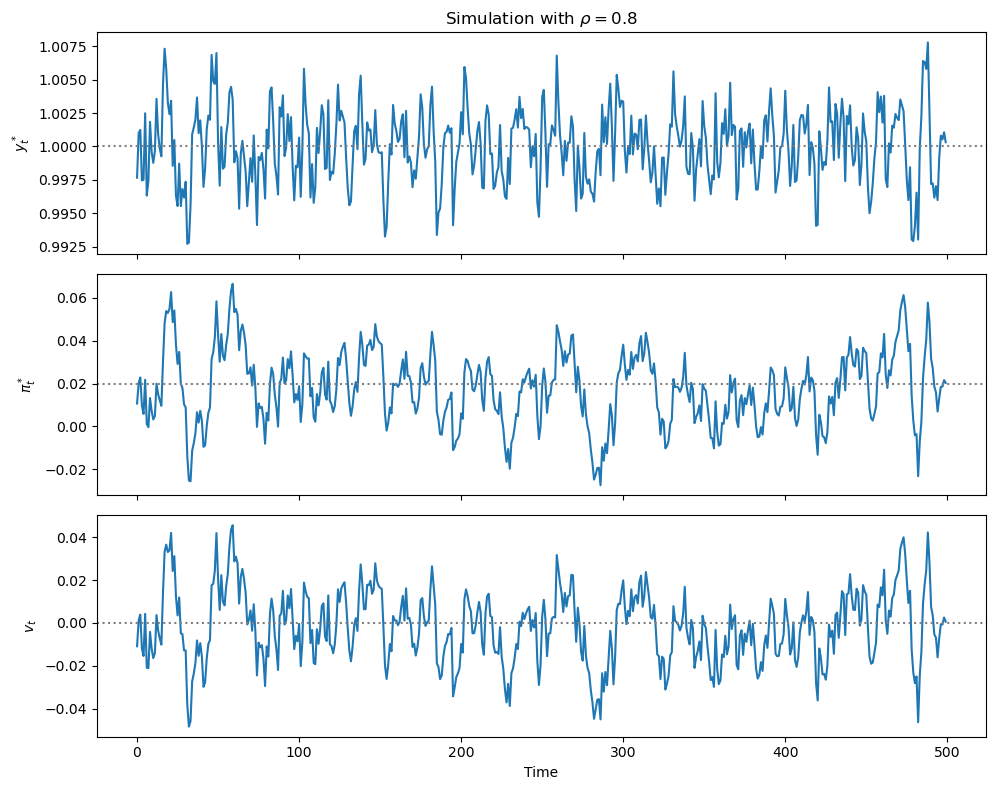

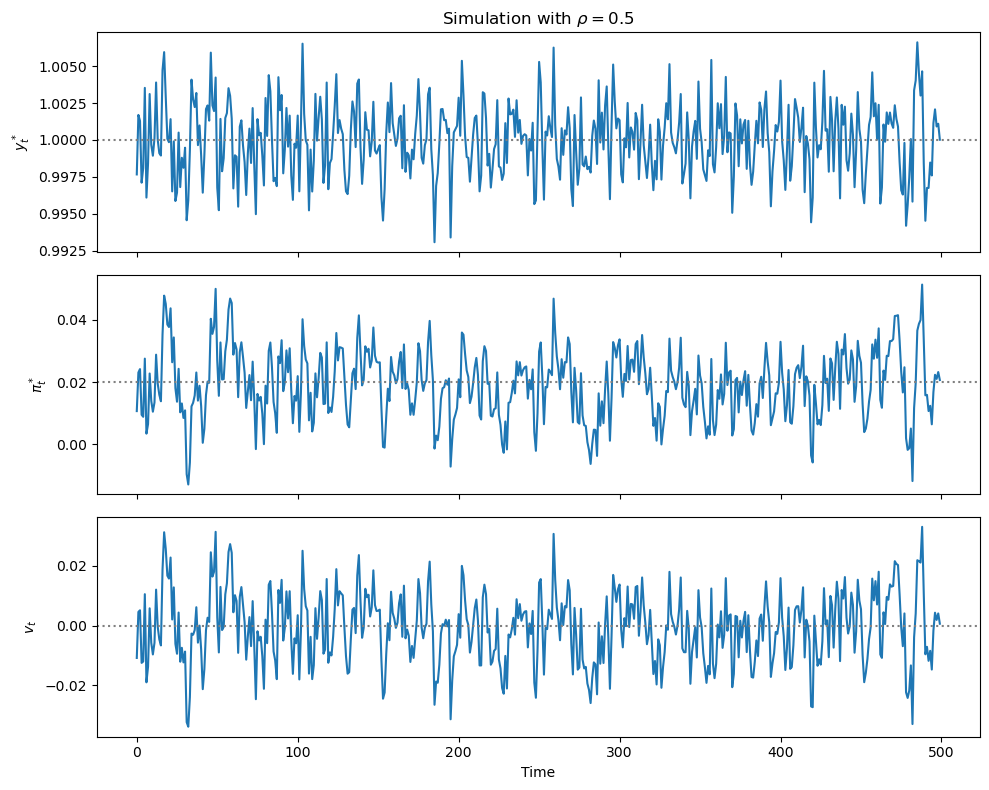

Moments (rho = 0.8, same random draws):
Std(y*)      = 0.0027
Std(pi*)     = 0.0168
Corr(y*,pi*) = 0.5143

Moments (rho = 0.5, same random draws):
Std(y*)      = 0.0024
Std(pi*)     = 0.0109
Corr(y*,pi*) = 0.7010


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from ASADModel import ASADModelClass

# ------------------------------------------------
# Model
# ------------------------------------------------
model = ASADModelClass()
p = model.par
phi = p['phi']

# ------------------------------------------------
# Simulation parameters
# ------------------------------------------------
T = 500
sigma_eps = 0.01

# ------------------------------------------------
# SAME random draws for all simulations
# ------------------------------------------------
np.random.seed(123)
eps = sigma_eps * np.random.randn(T)

# ------------------------------------------------
# Simulation function (uses SAME eps)
# ------------------------------------------------
def simulate_asad(rho, eps):

    v = np.zeros(T)
    pi_e = np.zeros(T)
    y_star = np.zeros(T)
    pi_star = np.zeros(T)

    pi_e[0] = p['pi_star']
    v_prev = 0.0

    for t in range(T):

        # AR(1) demand shock
        v[t] = rho * v_prev + eps[t]
        v_prev = v[t]

        # equilibrium
        y_star[t], pi_star[t] = model.equilibrium(pi_e[t], v[t])

        # adaptive expectations
        if t < T - 1:
            pi_e[t+1] = phi * pi_e[t] + (1 - phi) * pi_star[t]

    return y_star, pi_star, v

# ------------------------------------------------
# Run simulations with SAME random draws
# ------------------------------------------------
y_08, pi_08, v_08 = simulate_asad(rho=0.8, eps=eps)
y_05, pi_05, v_05 = simulate_asad(rho=0.5, eps=eps)

# ------------------------------------------------
# Time series plots: rho = 0.8
# ------------------------------------------------
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axes[0].plot(y_08)
axes[0].axhline(p['ybar'], linestyle=':', color='gray')
axes[0].set_ylabel(r'$y_t^*$')
axes[0].set_title('Simulation with $\\rho = 0.8$')

axes[1].plot(pi_08)
axes[1].axhline(p['pi_star'], linestyle=':', color='gray')
axes[1].set_ylabel(r'$\pi_t^*$')

axes[2].plot(v_08)
axes[2].axhline(0, linestyle=':', color='gray')
axes[2].set_ylabel(r'$v_t$')
axes[2].set_xlabel('Time')

plt.tight_layout()
plt.show()

# ------------------------------------------------
# Time series plots: rho = 0.5
# ------------------------------------------------
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axes[0].plot(y_05)
axes[0].axhline(p['ybar'], linestyle=':', color='gray')
axes[0].set_ylabel(r'$y_t^*$')
axes[0].set_title('Simulation with $\\rho = 0.5$')

axes[1].plot(pi_05)
axes[1].axhline(p['pi_star'], linestyle=':', color='gray')
axes[1].set_ylabel(r'$\pi_t^*$')

axes[2].plot(v_05)
axes[2].axhline(0, linestyle=':', color='gray')
axes[2].set_ylabel(r'$v_t$')
axes[2].set_xlabel('Time')

plt.tight_layout()
plt.show()

# ------------------------------------------------
# Moments
# ------------------------------------------------
def moments(y, pi):
    y_gap = y - p['ybar']
    sd_y = np.std(y_gap)
    sd_pi = np.std(pi)
    corr = np.corrcoef(y_gap, pi)[0, 1]
    return sd_y, sd_pi, corr

sd_y_08, sd_pi_08, corr_08 = moments(y_08, pi_08)
sd_y_05, sd_pi_05, corr_05 = moments(y_05, pi_05)

# ------------------------------------------------
# Print results
# ------------------------------------------------
print("Moments (rho = 0.8, same random draws):")
print(f"Std(y*)      = {sd_y_08:.4f}")
print(f"Std(pi*)     = {sd_pi_08:.4f}")
print(f"Corr(y*,pi*) = {corr_08:.4f}")

print("\nMoments (rho = 0.5, same random draws):")
print(f"Std(y*)      = {sd_y_05:.4f}")
print(f"Std(pi*)     = {sd_pi_05:.4f}")
print(f"Corr(y*,pi*) = {corr_05:.4f}")
